[[ 1  1  1 -1  1 -1  1 -1  1  1]
 [-1 -1  1  1  1 -1  1  1  1  1]
 [ 1 -1  1  1 -1  1  1  1  1  1]
 [ 1 -1 -1 -1 -1  1 -1 -1  1  1]
 [ 1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [-1  1  1 -1 -1  1  1 -1  1 -1]
 [-1  1 -1  1  1 -1  1  1  1  1]
 [ 1  1 -1 -1 -1  1  1  1 -1 -1]]


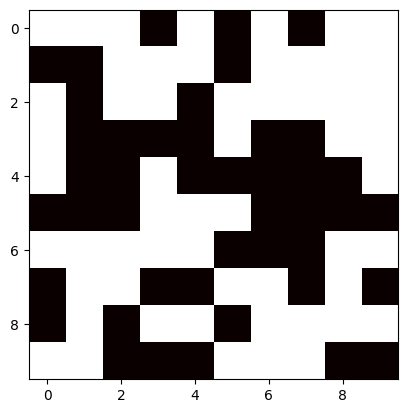

In [280]:
#we start with a 10 by 10 grid of spins

import numpy as np
import matplotlib.pyplot as plt
import random

#initialize the grid with random spins given a grid size n
def initialize_grid(n):
    rng = np.random.default_rng()
    grid = rng.choice([-1,1], size=(n,n))
    return grid

#test that the grid is initialized correctly

#we're going to start with a 10 by 10 grid
grid = initialize_grid(10)
print(grid)

#use matplotlib to visualize the grid as a heatmap
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.show()

In [281]:
#compute the energy of the grid
def compute_energy(grid):
    energy = 0
    n = len(grid)
    for i in range(n):
        for j in range(n):
            #check the energy at each point by selecting the nearest neighbors and checking whether they are the same spin
            #each neighbor contributes -1 to the energy if they are the same spin
            #each neighbor contributes +1 to the energy if they are the opposite spin
            energy += -grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    return energy/4

#test that the energy is computed correctly
print(compute_energy(grid))

-10.0


In [282]:
def generate_energy_map(grid):
    n = len(grid)
    energy_map = np.zeros((n,n), dtype=int)
    for i in range(n):
        for j in range(n):
            energy_map[i,j] = -grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    return energy_map

#test that the energy map is computed correctly
energy_map = generate_energy_map(grid) 
print(energy_map)

[[-2 -2  0  2  2  2  0  4  0 -2]
 [ 2  0 -2 -2  0  2 -2 -2 -4 -2]
 [ 0  0  0  0  2  0 -2 -2 -4 -4]
 [-2 -2 -2  0 -2  2  0  0  0 -4]
 [ 0 -2 -2  2  0  0 -4 -4  0  0]
 [ 0 -2  0 -2 -2  2 -2 -4 -2  0]
 [ 0 -2 -2 -2  0  2 -2 -2  0  0]
 [ 0 -2  0  2  2  2  0  2  0  2]
 [ 2  0  2  2  2  4 -2 -2 -2  2]
 [ 0 -2  0 -2  2  2 -4  0  2  2]]


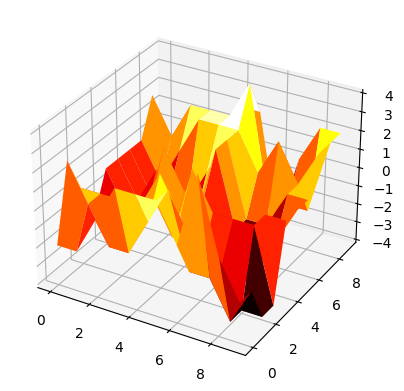

In [283]:
#prints the energy map as a 3d plot
from mpl_toolkits.mplot3d import Axes3D

def plot_energy_map(energy_map):
    n = len(energy_map)
    x = np.arange(n)
    y = np.arange(n)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, energy_map, cmap='hot')
    plt.show()

plot_energy_map(energy_map)

spin at (1,2) is flipped
[[ 1  1  1 -1  1 -1  1 -1  1  1]
 [-1 -1 -1  1  1 -1  1  1  1  1]
 [ 1 -1  1  1 -1  1  1  1  1  1]
 [ 1 -1 -1 -1 -1  1 -1 -1  1  1]
 [ 1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [-1  1  1 -1 -1  1  1 -1  1 -1]
 [-1  1 -1  1  1 -1  1  1  1  1]
 [ 1  1 -1 -1 -1  1  1  1 -1 -1]]
-8.0


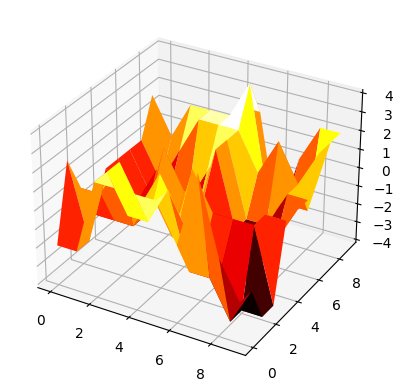

In [284]:
#flip a random spin in the grid
def flip_spin(grid):
    n = len(grid)
    i = random.randint(0,n-1)
    j = random.randint(0,n-1)
    grid[i,j] = -grid[i,j]
    print("spin at (" + str(i) + "," + str(j) + ") is flipped")
    return grid

#test that the spin is flipped correctly
changed_grid = flip_spin(grid)
print(changed_grid)
print(compute_energy(changed_grid))
plot_energy_map(generate_energy_map(changed_grid))

In [285]:
def metropolis(grid, kT):
    n = len(grid)
    i = random.randint(0,n-1)
    j = random.randint(0,n-1)
    delta_E = 2*grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    if delta_E < 0:
        grid[i,j] = -grid[i,j]
    elif random.random() < np.exp(-delta_E/kT):
        grid[i,j] = -grid[i,j]
    return grid

In [286]:
def ising(n,kT,nsteps):
    grid = initialize_grid(n)
    

    #plot the initial grid
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.show()

    print("Initial grid energy", compute_energy(grid))
    
    for steps in range(nsteps):
        grid = metropolis(grid, kT)
    
    
    #plot the final grid
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.show()
    
    print("Final grid energy:", compute_energy(grid))

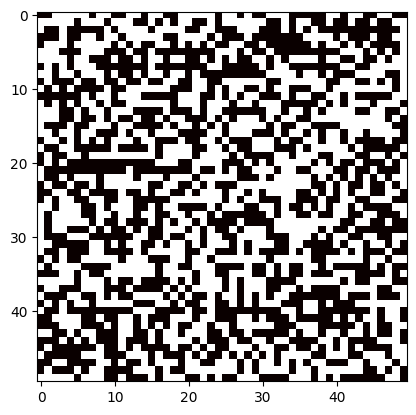

Initial grid energy 76.0


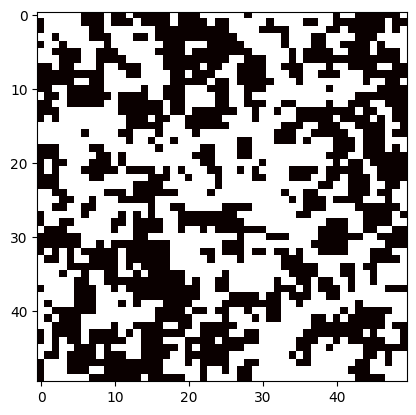

Final grid energy: -920.0


In [287]:
n = 50
kT = 3
nsteps = 10000
ising(n,kT,nsteps)

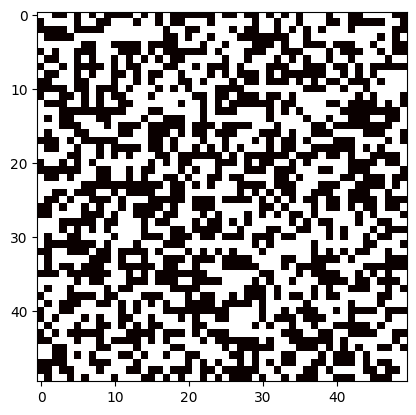

Initial grid energy 0.0


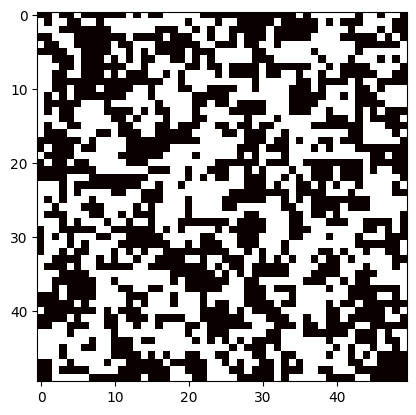

Final grid energy: -548.0


In [288]:
n = 50
kT = 5
nsteps = 10000
ising(n,kT,nsteps)

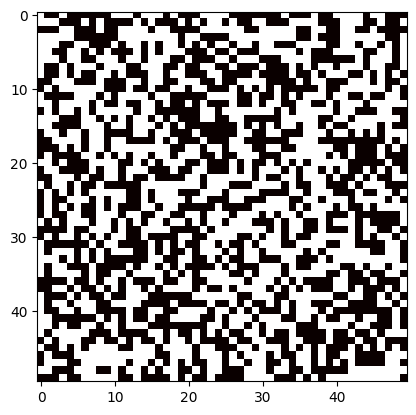

Initial grid energy 40.0


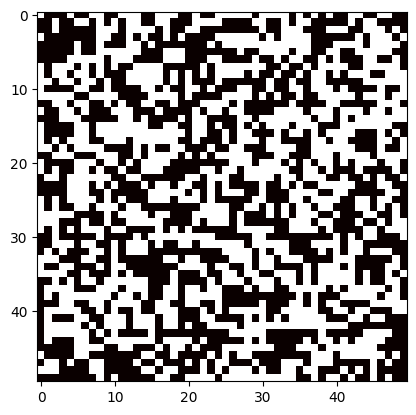

Final grid energy: -238.0


In [289]:
n = 50
kT = 10
nsteps = 10000
ising(n,kT,nsteps)